# Breast Cancer Prediction

The data and problem description is here:
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Original)

Need to predict breast cancer, using supervised machine learning skills. This is version II, I used the messy data 'breast-cancer-wisconsin.txt', which is original. Machine learning models can be implemented for classification.  

In [1]:
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#from pandas.api.types import is_numeric_dtype
#from sklearn import preprocessing
#from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#from sklearn.decomposition import PCA
#from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

## EDA

In [2]:
df = pd.read_csv('breast-cancer-wisconsin.txt')

In [3]:
df

,Index,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,0,1241035,7,8,3,7,4,5,7,8,2,4
1,1,1107684,6,10,5,5,4,10,6,10,1,4
2,2,691628,8,6,4,10,10,1,3,5,1,4
3,3,1226612,7,5,6,3,3,8,7,4,1,4
4,4,1142706,5,10,10,10,6,10,6,5,2,4
5,5,601265,10,4,4,6,2,10,2,3,1,4
6,6,378275,10,9,7,3,4,2,7,7,1,4
7,7,1142706,5,10,10,10,6,10,6,5,2,4
8,8,601265,10,4,4,6,2,10,2,3,1,4
9,9,1226612,7,5,6,3,3,8,7,4,1,4


In [4]:
columns = list(df.columns.values)

In [5]:
# Header names:

columns

['Index',
 'ID',
 'Clump Thickness',
 'Uniformity of Cell Size',
 'Uniformity of Cell Shape',
 'Marginal Adhesion',
 'Single Epithelial Cell Size',
 'Bare Nuclei',
 'Bland Chromatin',
 'Normal Nucleoli',
 'Mitoses',
 'Class']

In [6]:
# Any duplicated records? Remove duplicated entries

df = df.drop(df[df['ID'].duplicated()].index)
df

,Index,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,0,1241035,7,8,3,7,4,5,7,8,2,4
1,1,1107684,6,10,5,5,4,10,6,10,1,4
2,2,691628,8,6,4,10,10,1,3,5,1,4
3,3,1226612,7,5,6,3,3,8,7,4,1,4
4,4,1142706,5,10,10,10,6,10,6,5,2,4
5,5,601265,10,4,4,6,2,10,2,3,1,4
6,6,378275,10,9,7,3,4,2,7,7,1,4
10,10,1169049,7,3,4,4,3,3,3,2,7,4
12,12,1111249,10,6,6,3,4,5,3,6,1,4
13,13,1076352,3,6,4,10,3,3,3,4,1,4


In [7]:
df.shape

(666, 12)

In [8]:
df.dtypes

Index                           int64
ID                              int64
Clump Thickness                 int64
Uniformity of Cell Size        object
Uniformity of Cell Shape       object
Marginal Adhesion              object
Single Epithelial Cell Size    object
Bare Nuclei                    object
Bland Chromatin                object
Normal Nucleoli                object
Mitoses                        object
Class                          object
dtype: object

In [9]:
df['Uniformity of Cell Size'].unique()

array(['8', '10', '6', '5', '4', '9', '3', '1', '2', '7', '50', '100',
       '30', '80', '40', '60', '90', '?', '20'], dtype=object)

In [10]:
df['Uniformity of Cell Shape'].unique()

array(['3', '5', '4', '6', '10', '7', '1', '2', '60', '100', '40', '9',
       '8', '30', '50', '70', '?'], dtype=object)

In [11]:
df['Bland Chromatin'].unique()

array(['7', '6', '3', '2', '4', '1', '5', '70', '30', '40', '10', '8',
       '20', '9', '60', '?', '50'], dtype=object)

In [12]:
# Remove question mark "?" in the data

for column in columns:
    if (column != 'Index' or column != 'ID'):
        df = df[df[column] != '?']

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [13]:
df.shape

(649, 12)

In [17]:
# Con

for column in columns:
    if (column != 'Index' or column != 'ID'):
        df[column] = df[column].astype(int)

In [18]:
df.dtypes

Index                          int64
ID                             int64
Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

In [14]:
# Still something wrong: some numbers need to be rescaled to 1-10

df

,Index,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,0,1241035,7,8,3,7,4,5,7,8,2,4
1,1,1107684,6,10,5,5,4,10,6,10,1,4
2,2,691628,8,6,4,10,10,1,3,5,1,4
3,3,1226612,7,5,6,3,3,8,7,4,1,4
4,4,1142706,5,10,10,10,6,10,6,5,2,4
5,5,601265,10,4,4,6,2,10,2,3,1,4
6,6,378275,10,9,7,3,4,2,7,7,1,4
10,10,1169049,7,3,4,4,3,3,3,2,7,4
12,12,1111249,10,6,6,3,4,5,3,6,1,4
13,13,1076352,3,6,4,10,3,3,3,4,1,4


In [15]:
# Need to work on these numbers

df[df.ID> 10000000]

,Index,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
167,167,12266120,70,50,60,30,30,80,70,40,10,40
213,213,11122090,80,100,100,10,30,60,30,90,10,40
243,243,11690490,70,30,40,40,30,30,30,20,70,40
374,374,11986410,100,100,60,30,30,100,40,30,20,40
1191,1191,12410350,70,80,30,70,40,50,70,80,20,40
1888,1888,12008920,80,60,50,40,30,100,60,10,10,40
2053,2053,11112490,100,60,60,30,40,50,30,60,10,40
2183,2183,11427060,50,100,100,100,60,100,60,50,20,40
2306,2306,10763520,30,60,40,100,30,30,30,40,10,40
2328,2328,12124220,40,10,10,10,20,10,30,10,10,20


In [19]:
for i in df[df.ID> 10000000].index:
    if i != 2685:
        df[df.Index == i] = df[df.Index == i]/10

In [20]:
for column in columns:
    if (column != 'Index' or column != 'ID'):
        df[column] = df[column].astype(int)

In [21]:
# Now looks good for modeling

df

,Index,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,0,1241035,7,8,3,7,4,5,7,8,2,4
1,1,1107684,6,10,5,5,4,10,6,10,1,4
2,2,691628,8,6,4,10,10,1,3,5,1,4
3,3,1226612,7,5,6,3,3,8,7,4,1,4
4,4,1142706,5,10,10,10,6,10,6,5,2,4
5,5,601265,10,4,4,6,2,10,2,3,1,4
6,6,378275,10,9,7,3,4,2,7,7,1,4
10,10,1169049,7,3,4,4,3,3,3,2,7,4
12,12,1111249,10,6,6,3,4,5,3,6,1,4
13,13,1076352,3,6,4,10,3,3,3,4,1,4


## Machine Learning Models

In [22]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y = df.Class
X = df.drop(['ID','Class'], axis=1)

y = np.array([number[0] for number in lb.fit_transform(y)])

# Split the data into training and testing, pretty standard pipeline

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=66)

### Logistic Regression

In [23]:
# Fit Logistic regression model

logreg = LogisticRegression(random_state=66, class_weight='balanced')
logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)
f1_score(y_test, y_pred)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9714285714285714

In [24]:
np.array(np.unique(y_test, return_counts=True)).T

array([[ 0, 59],
       [ 1, 71]])

In [25]:
logreg_matrix = metrics.confusion_matrix(y_test,y_pred)
logreg_matrix

array([[58,  1],
       [ 3, 68]])

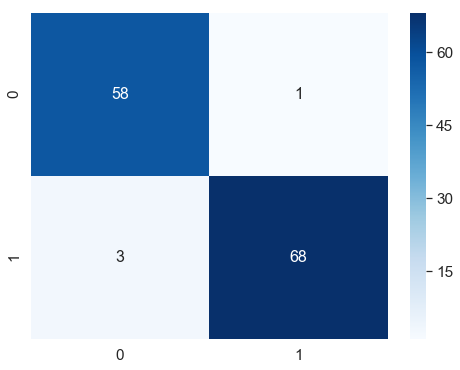

In [26]:
df_cm = pd.DataFrame(logreg_matrix, range(2),
                  range(2))
plt.figure(figsize = (8,6))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, cmap="Blues")# font size

plt.show()

In [27]:
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred)

### SVM

In [28]:
# Fit SVM model

svc_model = SVC(kernel='linear', C=1)
svc_model.fit(X_train,y_train)
y_pred = svc_model.predict(X_test)
fpr_svc, tpr_svc, _ = roc_curve(y_test, y_pred)
svc_matrix = metrics.confusion_matrix(y_test,y_pred)
svc_matrix

array([[56,  3],
       [ 3, 68]])

In [29]:
f1_score(y_test, y_pred)

0.9577464788732394

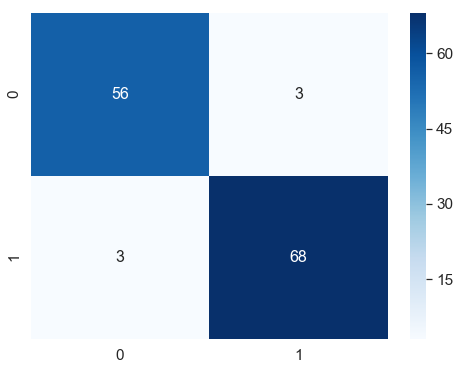

In [30]:
df_cm = pd.DataFrame(svc_matrix, range(2),
                  range(2))
plt.figure(figsize = (8,6))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, cmap="Blues")# font size

plt.show()

### Random Forest

In [31]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=66)
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
fpr_rf, tpr_rf, _= roc_curve(y_test, y_pred)
f1_score(y_test, y_pred)

0.9784172661870503

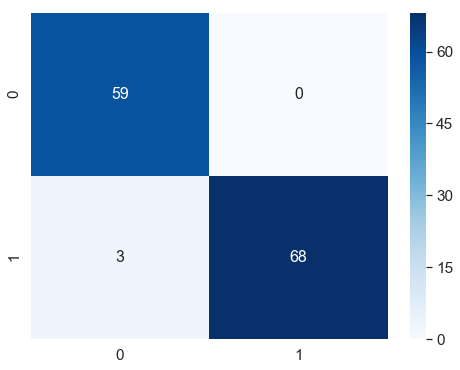

In [32]:
rf_matrix = metrics.confusion_matrix(y_test,y_pred)

df_cm = pd.DataFrame(rf_matrix, range(2),
                  range(2))
plt.figure(figsize = (8,6))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, cmap="Blues")# font size

plt.show()

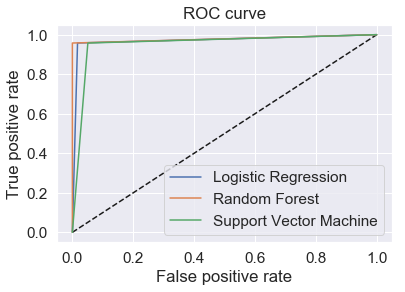

In [33]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_log, tpr_log, label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot(fpr_svc, tpr_svc, label='Support Vector Machine')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()